As an introduction, here are some useful beginner python tutorial videos:

[Scientifically oriented python tutorial playlist](https://www.youtube.com/playlist?list=PLkdGijFCNuVnGxo-1fSNcdHh5gZc17oRM)

[Engineering math intro](https://www.youtube.com/watch?v=-CX9B_SB8ME)

We'll start with a simple plot.  You can see how to to import the needed libraries, set up on array from 0 to 15 with 30 spaces between those points.

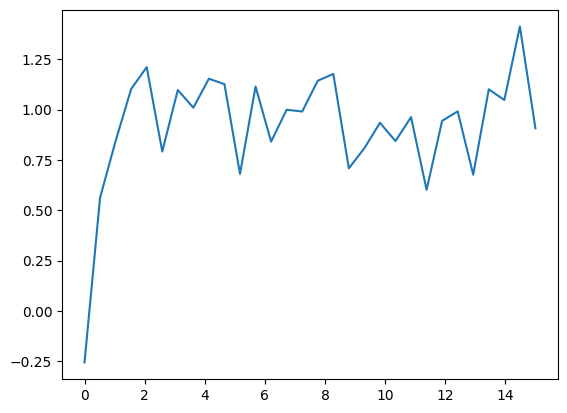

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(0,15,30)
y = np.tanh(x) + 0.2*np.random.randn(len(x))

plt.plot(x,y)


Next, a slightly more complicated plot.  this shows how to plot with different axes, set up a dot plot, control color, lw (line width), ms (marker size).

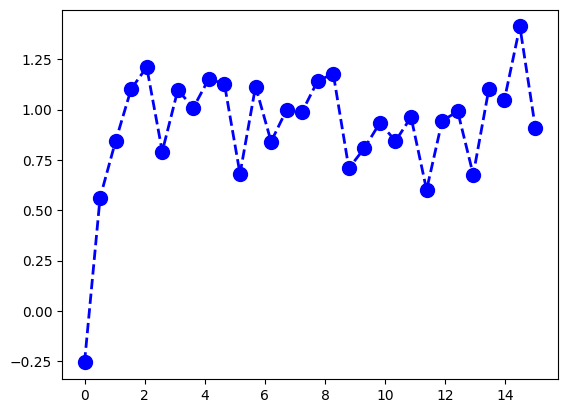

In [3]:
plt.plot(x,y, 'o--', color='blue', lw=2, ms=10)

Now we add specific dimensions to the graph.  Here you can see how to label axes, set up a legend ncol(number of columns) and shift where on the graph the information is displayed

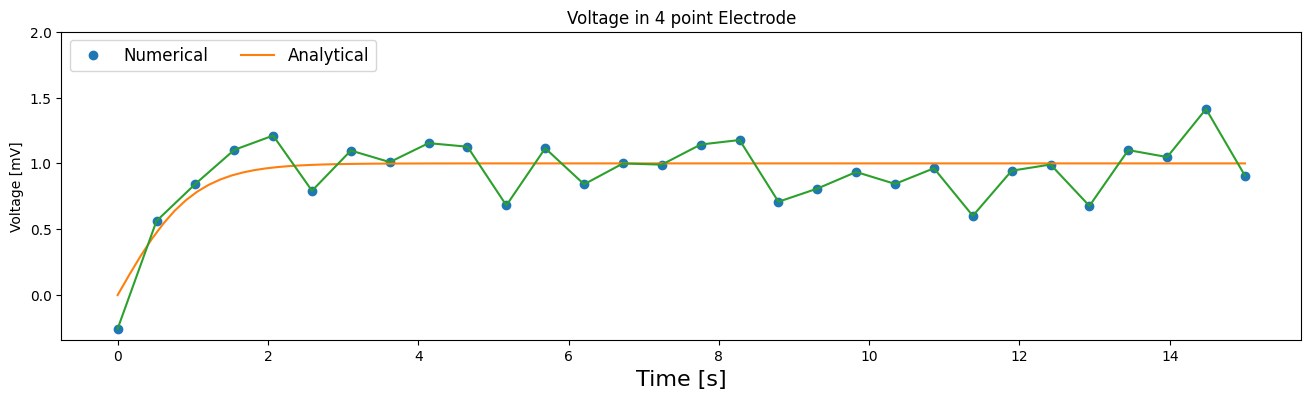

In [4]:
x2 = np.linspace(0, 15, 100)
y2 = np.tanh(x2)

plt.figure(figsize=(16,4))

plt.plot(x,y, 'o', label='Numerical')
plt.plot(x2,y2, '-', label='Analytical')
plt.plot(x,y)
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [mV]')
plt.title('Voltage in 4 point Electrode')

plt.legend(loc='upper left', fontsize=12, ncol=2)
plt.ylim(top=2)
plt.show()

Next, we'll show basic histograms.  Note that bins here is the number of columns.

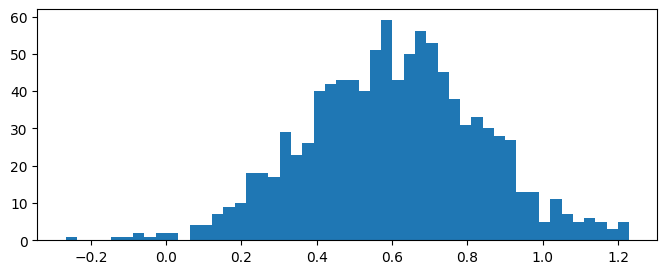

In [ ]:
res = np.random.randn(1000)*0.23 + 0.6

plt.figure(figsize=(8,3))
plt.hist(res, bins=50)
plt.show()

Here, we can see histtype lets you create different types of histograms, density sets the area undernear the lines equal to 1.

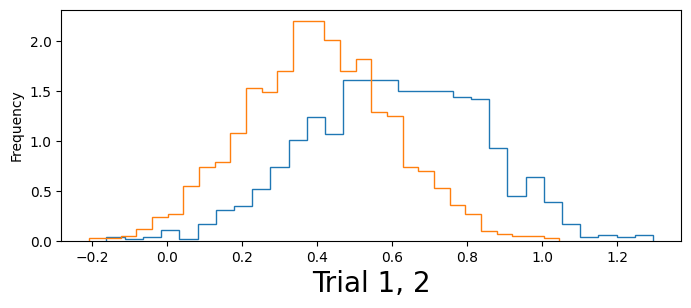

In [ ]:
res2 = np.random.randn(1000)*0.2 + 0.4

plt.figure(figsize=(8,3))
plt.hist(res, bins=30, density=True, histtype='step')
plt.hist(res2, bins=30, density=True, histtype='step')
plt.xlabel('Trial 1, 2', fontsize=20)
plt.ylabel('Frequency')
plt.show()



This is a basic contour plot using all the same tools as above.

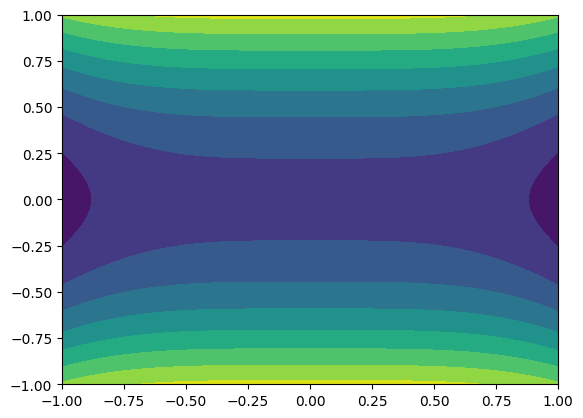

In [7]:
plt.style.use(['default'])

_ = np.linspace(-1, 1, 1000)
x, y = np.meshgrid(_,_)
z = np.cosh(x)*np.cos(x)+np.sinh(y)*np.sin(y)
plt.contourf(x,y,z)

Adding more details.  Levels to increase resolution.  Note that this is plotting the data from the last graph.

Text(0, 0.5, 'Vertical Position [m]')

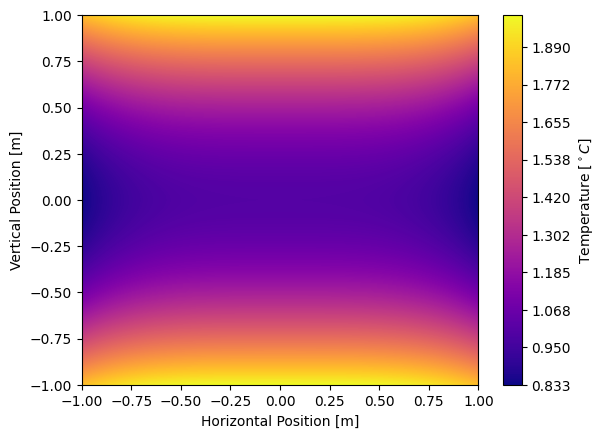

In [12]:
plt.contourf(x,y,z, levels=500, cmap='plasma')
plt.colorbar(label='Temperature [$^\circ C$]')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')

Now an introduction to plotting vectore fields.  We're creating new variables and arrays here.  The names are arbitrary here.  It's also important to note that = just assigns a variable to a command and any time you use it afterwards reassigns it.  Actually equality is done with ==.  

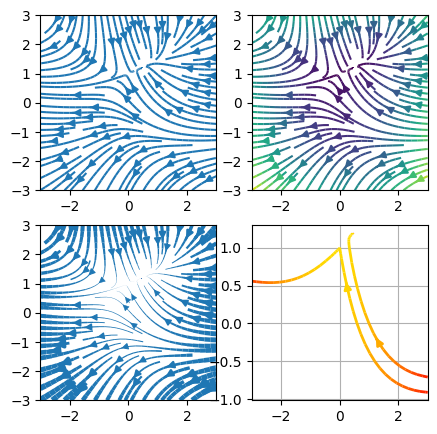

In [ ]:
w = 3
_ = np.linspace(-3,3,100)
X, Y = np.meshgrid(_,_)
U = -1 - X**2 + Y
V = 1 + np.sin(X) - Y**2
speed = np.sqrt(U**2 + V**2)

fig, axes = plt.subplots(2,2,figsize=(5,5))
ax = axes[0][0]
ax.streamplot(X, Y, U, V)
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color=speed)
ax = axes[1][0]
lw = 5*speed / speed.max()
ax.streamplot(X, Y, U, V, linewidth=lw)
ax = axes[1][1]
seed_points = np.array([[0,1], [1,0]])
ax.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points)
ax.grid()



<a list of 38 text.Text objects>

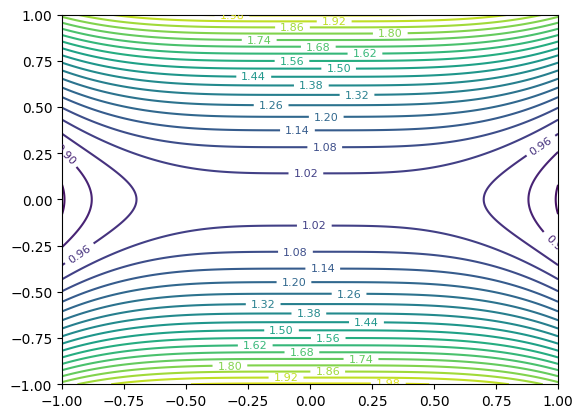

In [ ]:
cs = plt.contour(x,y,z, levels=20)
plt.clabel(cs, fontsize=8)

A very basic 3D plot.  You can change the vew by changing the values elev and azim.

:

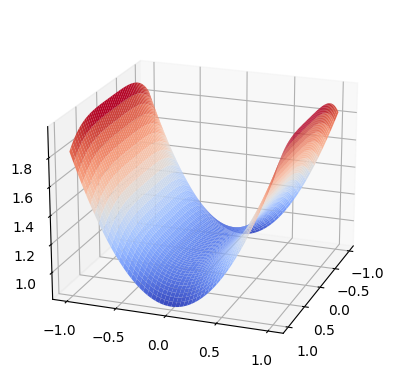

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=True)
ax.view_init(elev=20, azim=20)

Finally, a more complicated example.  This is a solution of the heat equation with a waterfall plot showing evolution over time.

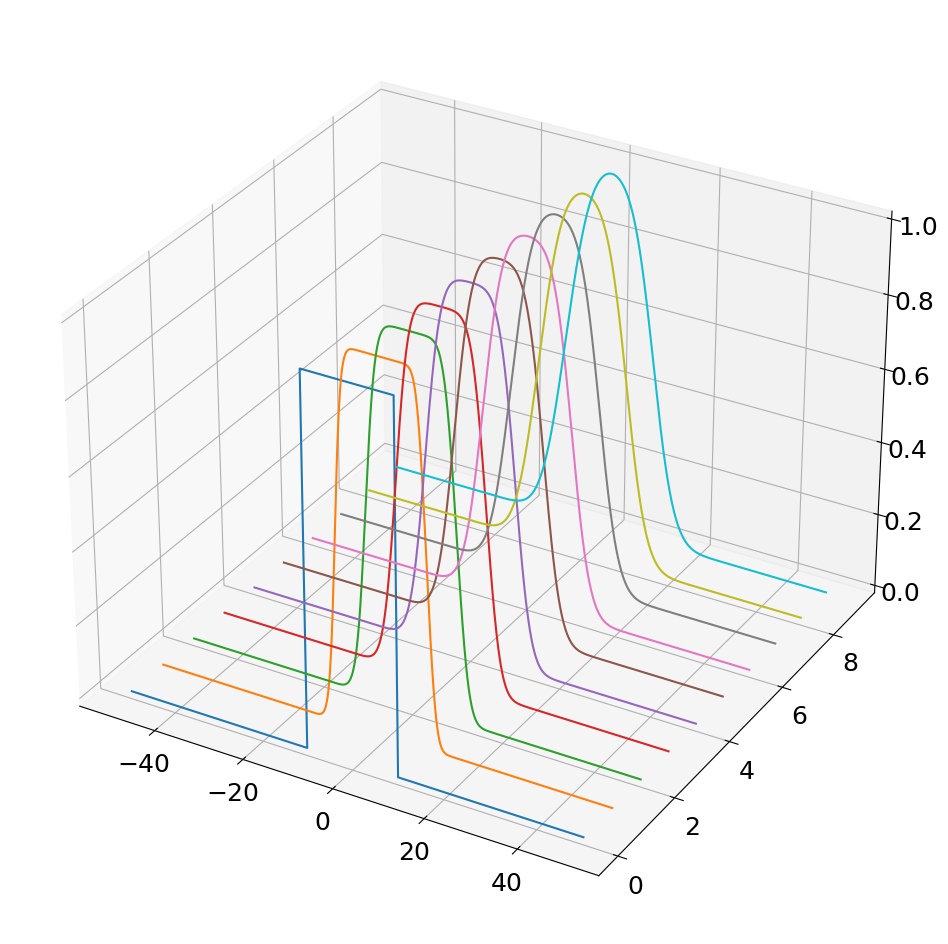

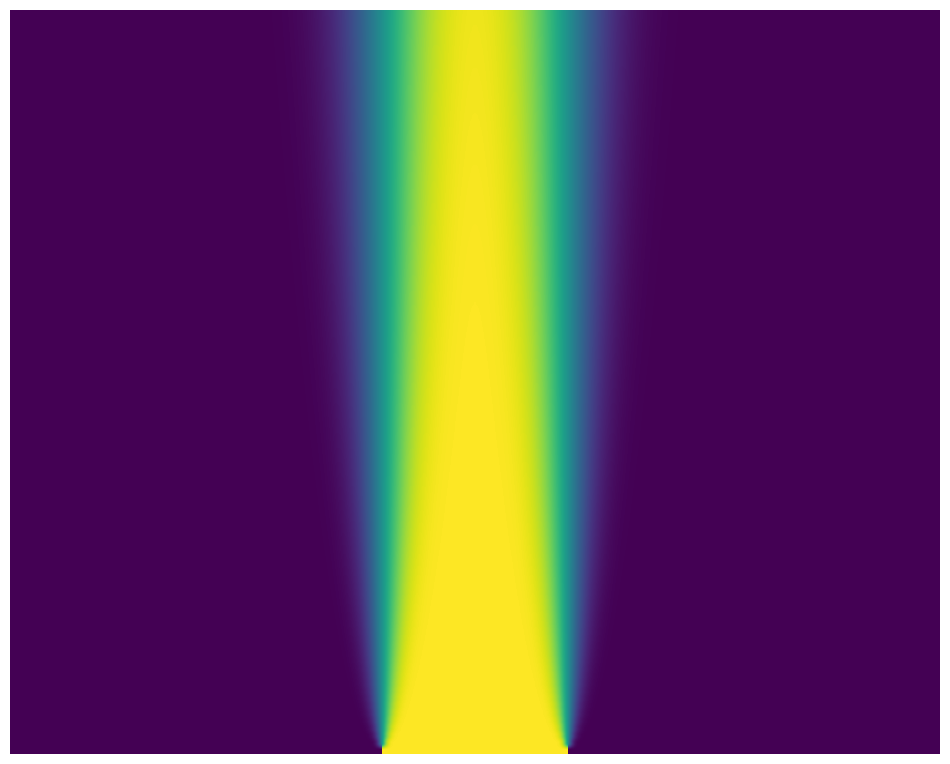

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

a = 1    # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0)

# SciPy's odeint function doesn't play well with complex numbers, so we recast
# the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))

uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])

# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()